In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from pathlib import Path


df = pd.read_csv('dfmodel.csv')
df = df[['ds', 'y']]
df.sort_values(by='ds', inplace=True)
print(df.head())



            ds    y
0      2020-12  0.0
934    2020-12  0.0
7084   2020-12  0.0
7083   2020-12  0.0
16645  2020-12  0.0


<Axes: xlabel='ds'>

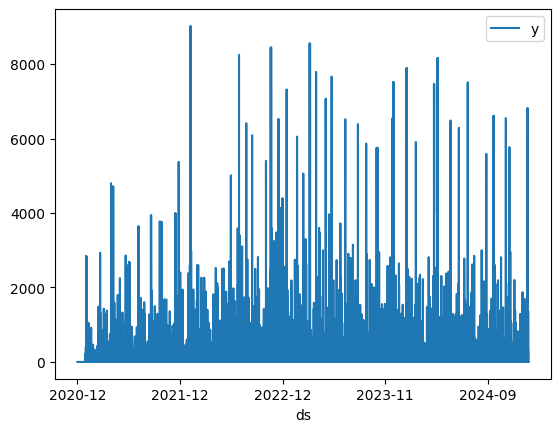

In [ ]:

# df.set_index('ds').plot()


   CODIGO_MED       ds  PRECIO  TOTAL_CONSUMO  STOCK_FIN MEDTIP MEDPET  \
0          91  2020-12    0.03            0.0        260      M      P   
1          91  2021-01    0.03          214.0         46      M      P   
2          91  2021-02    0.03           46.0        800      M      P   
3          91  2021-03    0.03           10.0        790      M      P   
4          91  2021-04    0.03           80.0        710      M      P   

    MEDFF MEDEST  
0  TABLET      _  
1  TABLET      _  
2  TABLET      _  
3  TABLET      _  
4  TABLET      _  


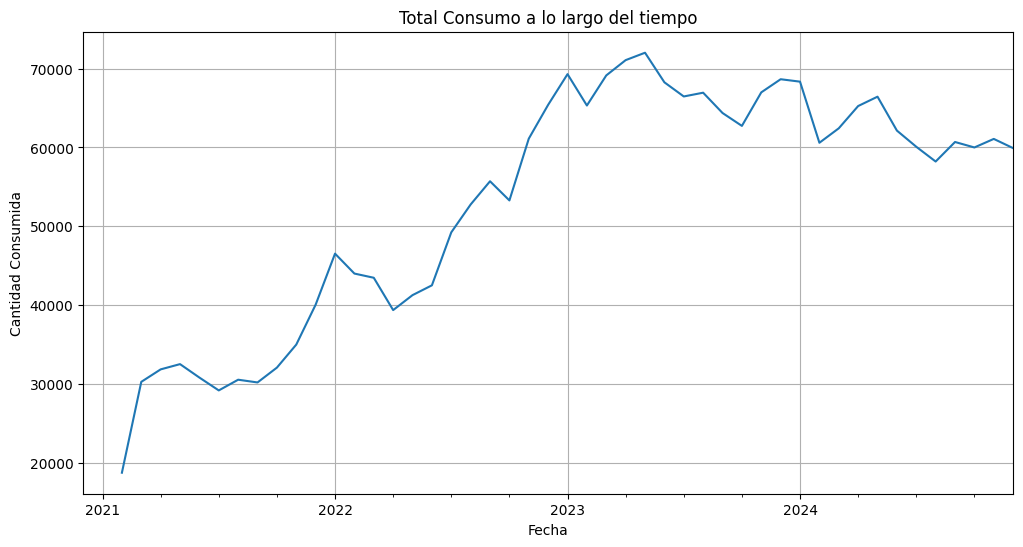

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2020-12-31 to 2024-12-31
Freq: ME
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CODIGO_MED     49 non-null     int64  
 1   PRECIO         49 non-null     float64
 2   TOTAL_CONSUMO  47 non-null     float64
 3   STOCK_FIN      49 non-null     int64  
 4   MEDTIP         49 non-null     object 
 5   MEDPET         49 non-null     object 
 6   MEDFF          49 non-null     object 
 7   MEDEST         49 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.4+ KB
None


In [84]:
df2 = pd.read_csv('df.csv')

print(df2.head())

df = df2.sort_values(by='ds')
df.set_index('ds', inplace=True)
df.index = pd.to_datetime(df.index)
df = df.resample('ME').sum()
df['TOTAL_CONSUMO'] = df['TOTAL_CONSUMO'].rolling(window=3).mean()
df['TOTAL_CONSUMO'].plot(figsize=(12, 6))
plt.title('Total Consumo a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Consumida')
plt.grid(True)
plt.show()
print(df.info())




In [89]:
# me voy a quedar con total_consumo, stock_fin (CORR DE 0.063), ds y codigoMED
df2 = df2[['CODIGO_MED', 'TOTAL_CONSUMO', 'STOCK_FIN', 'ds']]
print(df2.head())
# df2.set_index('ds', inplace=True)

df2.count()
# quiero contar cuantas pastillas CODIGO_MED unicas hay 
print(df2['CODIGO_MED'].nunique())

# en el futuro tal vez podria usar un LSTM en vez de prophet ya que voy a morirme

   CODIGO_MED  TOTAL_CONSUMO  STOCK_FIN       ds
0          91            0.0        260  2020-12
1          91          214.0         46  2021-01
2          91           46.0        800  2021-02
3          91           10.0        790  2021-03
4          91           80.0        710  2021-04
490
